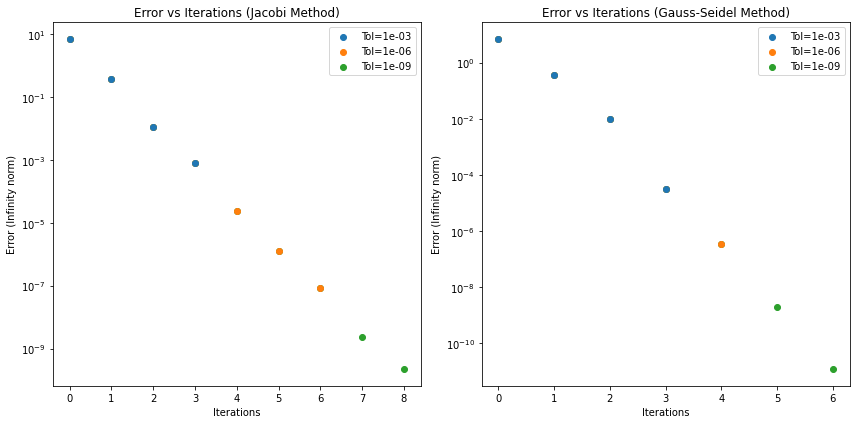

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy() 
    errors = []  # To track error at each iteration
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)  # Append the error at each iteration
        
        # Check for convergence
        if error < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors


def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []  # To track error at each iteration
    
    for k in range(max_iterations):
        x_new = x.copy()
 
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))  # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))  # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)  # Append the error at each iteration

        if error < tol:
            return x_new, k, errors
 
        x = x_new
 
    return x, max_iterations, errors


# Set variables
A = ([[3, -0.1, -0.2],
     [0.1, 7, -0.3],
     [0.3, -0.2, 10]])

b = [7.85, -19.3, 71.4]

# Initial guess of [0,0,0]
x0 = np.zeros_like(b)

initial_tol = 1e-3
max_iterations = 100

# Jacobi method
jerrors = []
itlist = []
tollist = []  # Separate list for tolerances for Jacobi

tol = initial_tol  # Reset tolerance
for i in range(0, 3):
    solution, iterations, errors = jacobi(A, b, x0, tol, max_iterations)
    jerrors.append(errors)
    itlist.append(iterations)
    tollist.append(tol)  # Store current tolerance
    tol = tol * 1e-3  # Decrease tolerance

# Gauss-Seidel method
gerrors = []
gitlist = []
gtollist = []  # Separate list for tolerances for Gauss-Seidel

tol = initial_tol  # Reset tolerance
for j in range(0, 3):
    solution, iterations, errors = gauss_seidel(A, b, x0, tol, max_iterations)
    gerrors.append(errors)
    gitlist.append(iterations)
    gtollist.append(tol)  # Store current tolerance
    tol = tol * 1e-3  # Decrease tolerance

# Plotting the error vs iterations for Jacobi and Gauss-Seidel

plt.figure(figsize=(12, 6))

# Plot points for Jacobi
for i, errors in enumerate(jerrors):
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(errors)), errors, label=f'Tol={tollist[i]:.0e}', zorder=10 - i)  # Higher zorder for blue/orange
plt.title('Error vs Iterations (Jacobi Method)')
plt.xlabel('Iterations')
plt.ylabel('Error (Infinity norm)')
plt.yscale('log')
plt.legend()

# Plot points for Gauss-Seidel
for i, errors in enumerate(gerrors):
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(errors)), errors, label=f'Tol={gtollist[i]:.0e}', zorder=10 - i)  # Higher zorder for blue/orange
plt.title('Error vs Iterations (Gauss-Seidel Method)')
plt.xlabel('Iterations')
plt.ylabel('Error (Infinity norm)')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

#The plot is a downward slope as iterations to converge increase, changing colors, signifying that the last tolerance reached its max iterations
#However, tolerances 1e-6 and 1e-9 are both behind the blue dots of tolerance 1e-3 as they use the same method
#It would be redundant to show all three at the same point